In [1]:
#Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [48]:
#Read all the required data
df_test = pd.read_excel('C:/Users/satsin/Desktop/Battery life/extracted files/Linear_reg_v2.xlsx',sheet_name ='test')
df_train = pd.read_excel('C:/Users/satsin/Desktop/Battery life/extracted files/Linear_reg_v2.xlsx',sheet_name ='train')
df_test_sec = pd.read_excel('C:/Users/satsin/Desktop/Battery life/extracted files/Linear_reg_v2.xlsx',sheet_name ='test_sec')

In [49]:
df_train.head()

,S_no,Variance,cell_No,cycle,log_variance,log_cycle,exp_variance
0,0,0.000007,b1c1,2160,-5.154902,3.334454,1.000007
1,1,0.000041,b1c3,1434,-4.387216,3.156549,1.000041
2,2,0.000070,b1c5,1074,-4.154902,3.031004,1.000070
3,3,0.000151,b1c7,870,-3.821023,2.939519,1.000151
4,4,0.000080,b1c11,788,-4.096910,2.896526,1.000080


In [50]:
df_train.nunique()

S_no            41
Variance        41
cell_No         41
cycle           38
log_variance    41
log_cycle       38
exp_variance    41
dtype: int64

In [51]:
df_train.describe()

,S_no,Variance,cycle,log_variance,log_cycle,exp_variance
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,20.000000,0.000284,673.756098,-3.676776,2.793970,1.000284
std,11.979149,0.000262,327.143530,0.376828,0.163581,0.000262
min,0.000000,0.000007,300.000000,-5.154902,2.477121,1.000007
25%,10.000000,0.000151,477.000000,-3.821023,2.678518,1.000151
50%,20.000000,0.000228,527.000000,-3.642065,2.721811,1.000228
75%,30.000000,0.000353,788.000000,-3.452225,2.896526,1.000353
max,40.000000,0.001681,2160.000000,-2.774432,3.334454,1.001682


C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


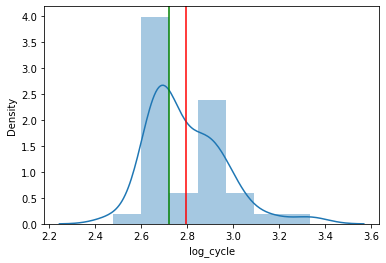

In [54]:
sns.distplot(df_train['log_cycle'])
plt.axvline(df_train['log_cycle'].mean(),color = 'r')
plt.axvline(df_train['log_cycle'].median(),color = 'g')

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


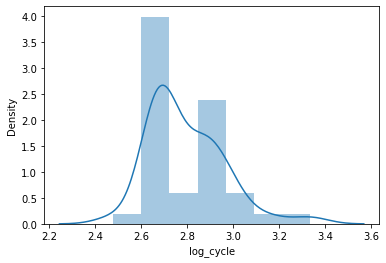

In [55]:
sns.distplot(df_train['log_cycle'])

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


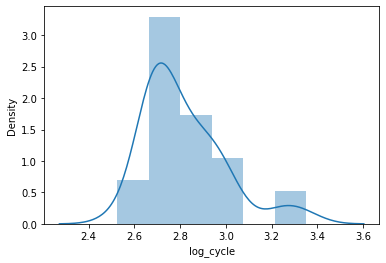

In [56]:
sns.distplot(df_test['log_cycle'])

In [57]:
df_test.head()

,S_no,Variance,cell_No,cycle,log_variance,log_cycle,exp_variance
0,0,0.000009,b1c0,1852,-5.045757,3.267641,1.000009
1,1,0.000011,b1c2,2237,-4.958607,3.349666,1.000011
2,2,0.000025,b1c4,1709,-4.602060,3.232742,1.000025
3,3,0.000169,b1c6,636,-3.772113,2.803457,1.000169
4,4,0.000105,b1c9,1054,-3.978811,3.022841,1.000105


In [58]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   S_no          42 non-null     int64  
 1   Variance      42 non-null     float64
 2   cell_No       42 non-null     object 
 3   cycle         42 non-null     int64  
 4   log_variance  42 non-null     float64
 5   log_cycle     42 non-null     float64
 6   exp_variance  42 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 2.4+ KB


In [59]:
df_test.nunique()

S_no            42
Variance        40
cell_No         42
cycle           41
log_variance    40
log_cycle       41
exp_variance    40
dtype: int64

In [60]:
df_test.describe()

,S_no,Variance,cycle,log_variance,log_cycle,exp_variance
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,21.000000,0.000234,722.642857,-3.760336,2.817021,1.000234
std,12.708745,0.000194,390.661030,0.393172,0.177777,0.000194
min,0.000000,0.000009,335.000000,-5.045757,2.525045,1.000009
25%,10.250000,0.000148,489.000000,-3.830489,2.689298,1.000148
50%,21.000000,0.000210,580.000000,-3.676847,2.763195,1.000211
75%,31.750000,0.000289,851.000000,-3.538838,2.929921,1.000289
max,42.000000,0.001240,2237.000000,-2.906578,3.349666,1.001241


In [61]:
df_test_sec.head()

,S_no,cell_no,variance,cycle,log_variance,log_cycle
0,0,b3c0,0.000059,1009,-4.229148,3.003891
1,1,b3c1,0.000056,1063,-4.251812,3.026533
2,2,b3c3,0.000076,1115,-4.119186,3.047275
3,3,b3c4,0.000064,1048,-4.193820,3.020361
4,4,b3c5,0.000080,828,-4.096910,2.918030


In [62]:
df_test_sec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   S_no          40 non-null     int64  
 1   cell_no       40 non-null     object 
 2   variance      40 non-null     float64
 3   cycle         40 non-null     int64  
 4   log_variance  40 non-null     float64
 5   log_cycle     40 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.0+ KB


C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


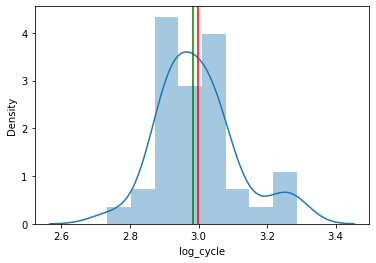

In [63]:
sns.distplot(df_test_sec['log_cycle'])
plt.axvline(df_test_sec['log_cycle'].mean(),color = 'r')
plt.axvline(df_test_sec['log_cycle'].median(),color = 'g')
plt.show()

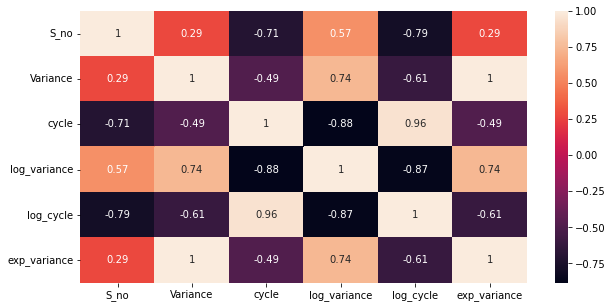

In [64]:
train = df_train.corr()
plt.figure(figsize=(10,5))
sns.heatmap(train, annot=True)
plt.show()

In [65]:
train

,S_no,Variance,cycle,log_variance,log_cycle,exp_variance
S_no,1.000000,0.285543,-0.705625,0.568418,-0.785799,0.285385
Variance,0.285543,1.000000,-0.485165,0.742728,-0.608840,1.000000
cycle,-0.705625,-0.485165,1.000000,-0.884550,0.955225,-0.485010
log_variance,0.568418,0.742728,-0.884550,1.000000,-0.867871,0.742568
log_cycle,-0.785799,-0.608840,0.955225,-0.867871,1.000000,-0.608701
exp_variance,0.285385,1.000000,-0.485010,0.742568,-0.608701,1.000000


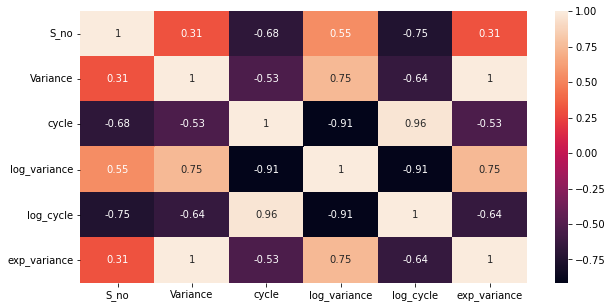

In [66]:
test = df_test.corr()
plt.figure(figsize=(10,5))
sns.heatmap(test, annot=True)
plt.show()

In [67]:
test

,S_no,Variance,cycle,log_variance,log_cycle,exp_variance
S_no,1.000000,0.311210,-0.678104,0.546240,-0.749475,0.311099
Variance,0.311210,1.000000,-0.530620,0.747177,-0.640043,1.000000
cycle,-0.678104,-0.530620,1.000000,-0.914876,0.964323,-0.530486
log_variance,0.546240,0.747177,-0.914876,1.000000,-0.906823,0.747052
log_cycle,-0.749475,-0.640043,0.964323,-0.906823,1.000000,-0.639918
exp_variance,0.311099,1.000000,-0.530486,0.747052,-0.639918,1.000000


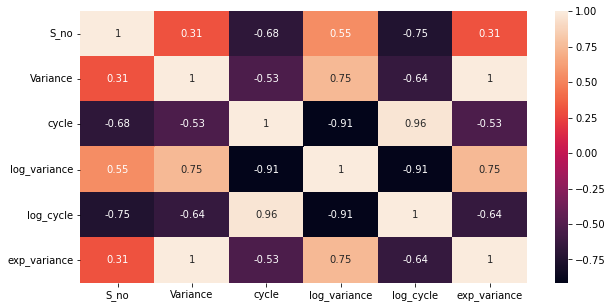

In [68]:
test_sec = df_test_sec.corr()
plt.figure(figsize=(10,5))
sns.heatmap(test, annot=True)
plt.show()

In [69]:
test_sec

,S_no,variance,cycle,log_variance,log_cycle
S_no,1.000000,-0.117500,0.096824,-0.167105,0.067706
variance,-0.117500,1.000000,-0.568491,0.912092,-0.674177
cycle,0.096824,-0.568491,1.000000,-0.739278,0.982545
log_variance,-0.167105,0.912092,-0.739278,1.000000,-0.802834
log_cycle,0.067706,-0.674177,0.982545,-0.802834,1.000000


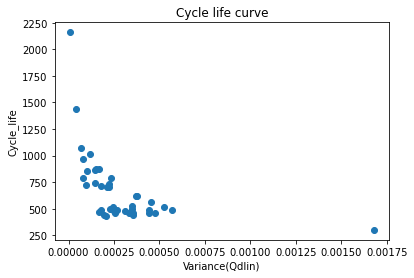

In [70]:
plt.scatter((df_train['Variance']),df_train['cycle'])
plt.xlabel('Variance(Qdlin)')
plt.ylabel('Cycle_life')
plt.title('Cycle life curve')
plt.show()

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


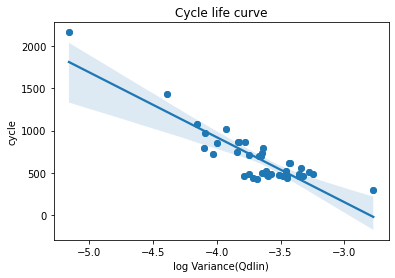

In [71]:
plt.scatter((df_train['log_variance']),df_train['cycle'])
sns.regplot((df_train['log_variance']),df_train['cycle'])
plt.xlabel('log Variance(Qdlin)')
plt.ylabel('cycle')
plt.title('Cycle life curve')
plt.show()

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


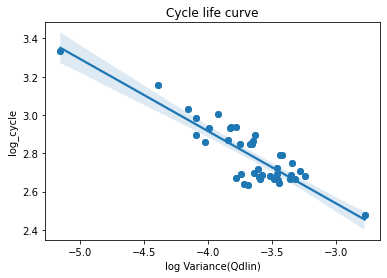

In [72]:
plt.scatter((df_train['log_variance']),df_train['log_cycle'])
sns.regplot((df_train['log_variance']),df_train['log_cycle'])
plt.xlabel('log Variance(Qdlin)')
plt.ylabel('log_cycle')
plt.title('Cycle life curve')
plt.show()

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


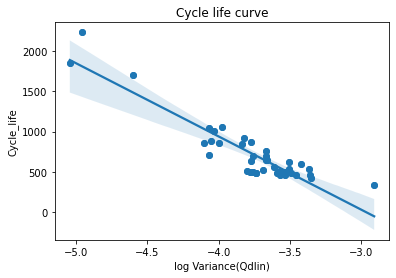

In [73]:
plt.scatter((df_test['log_variance']),df_test['cycle'])
sns.regplot((df_test['log_variance']),df_test['cycle'])
plt.xlabel('log Variance(Qdlin)')
plt.ylabel('Cycle_life')
plt.title('Cycle life curve')
plt.show()

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


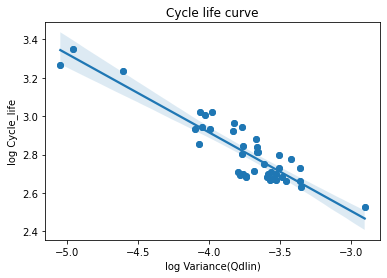

In [74]:
plt.scatter((df_test['log_variance']),df_test['log_cycle'])
sns.regplot((df_test['log_variance']),df_test['log_cycle'])
plt.xlabel('log Variance(Qdlin)')
plt.ylabel('log Cycle_life')
plt.title('Cycle life curve')
plt.show()

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


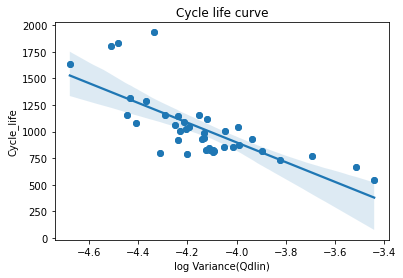

In [75]:
plt.scatter((df_test_sec['log_variance']),df_test_sec['cycle'])
sns.regplot((df_test_sec['log_variance']),df_test_sec['cycle'])
plt.xlabel('log Variance(Qdlin)')
plt.ylabel('Cycle_life')
plt.title('Cycle life curve')
plt.show()

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


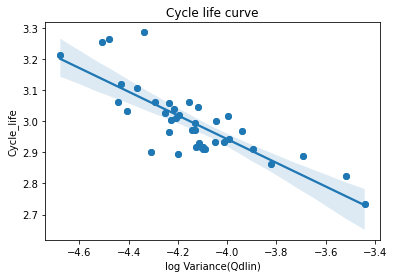

In [76]:
plt.scatter((df_test_sec['log_variance']),df_test_sec['log_cycle'])
sns.regplot((df_test_sec['log_variance']),df_test_sec['log_cycle'])
plt.xlabel('log Variance(Qdlin)')
plt.ylabel('Cycle_life')
plt.title('Cycle life curve')
plt.show()

In [77]:
#Check all the 4 assumption of linear regression:
#Calcuclate R square
#Sort the data in order
#Sampling
#Biasing
#SKewness
#box plot to see the outlair

#linear regression:
from sklearn.linear_model import LinearRegression

In [117]:
X_train =df_train['log_variance'].values.reshape(-1,1) 
y_train =df_train['log_cycle'].values.reshape(-1,1) #Target Variable
X_test = df_test['log_variance'].values.reshape(-1,1)
y_test =df_test['log_cycle'].values.reshape(-1,1)
y_test_1 =df_test['cycle'].values.reshape(-1,1)
X_test_sec=df_test_sec['log_variance'].values.reshape(-1,1)
y_test_sec=df_test_sec['log_cycle'].values.reshape(-1,1)
y_test_sec_1=df_test_sec['cycle'].values.reshape(-1,1)

In [94]:
linreg =LinearRegression()
linreg.fit(X_train,y_train)
y_pred_train = linreg.predict(X_train)
y_pred = linreg.predict(X_test)
y_pred_sec = linreg.predict(X_test_sec)
y_train_pred = linreg.predict(X_train)

In [80]:
def Matrix(y_test,y_pred):
    import pandas as pd
    from sklearn import metrics
    from sklearn.metrics import r2_score
    x = []
    MSE = metrics.mean_squared_error(y_test,y_pred)
    MAE = metrics.mean_absolute_error(y_test,y_pred)
    RMSE= np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
    R2_Score = r2_score(y_test,y_pred)
    x.extend([MSE,MAE,RMSE,MAPE,R2_Score])
    df = pd.DataFrame(x)
    df1 = df.transpose()
    df1.columns = ['MSE','MAE','RMSE','MAPE','R2_SCORE']
    return(df1)

In [95]:
Matrix(y_train,y_train_pred)

,MSE,MAE,RMSE,MAPE,R2_SCORE
0,0.006443,0.068265,0.080268,2.454986,0.7532


In [81]:
Matrix(y_test,y_pred)

,MSE,MAE,RMSE,MAPE,R2_SCORE
0,0.00572,0.065101,0.075629,2.315775,0.814606


In [82]:
Matrix(y_test_sec,y_pred_sec)

,MSE,MAE,RMSE,MAPE,R2_SCORE
0,0.005469,0.055352,0.073954,1.820297,0.586757


In [96]:
y_pred_1 = 10**y_pred
y_pred_sec_1 = 10**y_pred_sec
y_train_pred_1 = 10**y_train_pred
y_train_1 = 10**y_train

In [97]:
Matrix(y_train_1,y_train_pred_1)

,MSE,MAE,RMSE,MAPE,R2_SCORE
0,15021.806145,102.28805,122.563478,16.107241,0.85613


In [84]:
Matrix(y_test_1,y_pred_1)

,MSE,MAE,RMSE,MAPE,R2_SCORE
0,18624.803027,109.299685,136.472719,15.410926,0.874986


In [85]:
Matrix(y_test_sec_1,y_pred_sec_1)

,MSE,MAE,RMSE,MAPE,R2_SCORE
0,45301.363377,137.782936,212.841169,11.956076,0.512113


In [150]:
y_pred_2 = pd.DataFrame(y_pred_1)
y_pred_2.to_csv("C:/Users/satsin/Desktop/Battery life/Linreg_y_pred.csv")

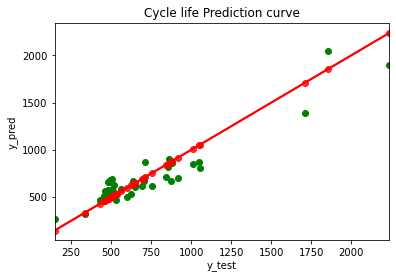

<Figure size 432x288 with 0 Axes>

In [147]:
plt.scatter(y_test_1,y_pred_1,color='g')
#plt.scatter(y_pred_sec,X_test_sec,color='g')
sns.regplot(y_test_1,y_test_1,color='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Cycle life Prediction curve')
plt.show()
plt.savefig("y_test_pred.jpg")

In [181]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# evaluate a model
def evaluate_model(X, y, model):
	# define model evaluation method
	cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	# force scores to be positive
	return absolute(scores)

# define the model
model = TheilSenRegressor()
# evaluate model
results = evaluate_model(X_train, y_train, model)
model.fit(X_train, y_train)
y_pred_ro = model.predict(X_test)
y_pred_sec_ro = model.predict(X_test_sec)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
# plot the line of best fit
#plot_best_fit(X_train, y_train, model)

Mean MAE: 0.074 (0.013)


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [182]:
y_pred_ro_1 = 10**y_pred_ro
y_pred_sec_ro_1 = 10**y_pred_sec_ro

In [162]:
y_pred_ro_huber = pd.DataFrame(y_pred_ro_1)
y_pred_ro_huber.to_csv("C:/Users/satsin/Desktop/Battery life/RANSACRegressor.csv")

In [183]:
y_pred_ro_1

array([2040.57711295, 1896.94175388, 1407.23789319,  702.25062381,
        834.97582382,  886.72583169,  926.01285447,  641.21107196,
        498.73767427,  872.65927803,  846.85537543,  738.79330045,
        733.38432091,  700.74528138,  643.37423571,  694.84254739,
        639.07492734,  562.53556805,  897.85425592,  642.28923951,
        524.50447451,  294.54996436,  340.1514039 ,  602.94352606,
        613.52208878,  497.07235543,  554.84223489,  683.57416774,
        600.40370331,  591.4223361 ,  708.39569881,  585.96171839,
        718.00447797,  682.21313474,  653.45932098,  694.84254739,
        562.53556805,  593.01795303,  574.86772811,  574.15574667,
        539.99926823,  494.61297444,  901.68203001])

In [184]:
y_pred_hub = []
for i in y_pred_ro_1:
    y_pred_hub.append([i])

In [185]:
#Huber Regression
Matrix(y_test_1,y_pred_hub)

,MSE,MAE,RMSE,MAPE,R2_SCORE
0,19177.739739,113.180915,138.483717,18.592642,0.87467


In [137]:
Matrix(y_test_sec_1,y_pred_sec_ro_1)

,MSE,MAE,RMSE,MAPE,R2_SCORE
0,42751.20633,133.075825,206.763648,25.072978,0.539578


In [131]:
#TheilSenRegressor
Matrix(y_test_1,y_pred_ro_1)

,MSE,MAE,RMSE,MAPE,R2_SCORE
0,19177.739739,113.180915,138.483717,53.66393,0.87467


In [132]:
Matrix(y_test_sec_1,y_pred_sec_ro_1)

,MSE,MAE,RMSE,MAPE,R2_SCORE
0,42240.158527,130.774375,205.524107,24.950388,0.545082


In [73]:
#RANSACRegressor
Matrix(y_test_1,y_pred_ro_1)

,MSE,MAE,RMSE,MAPE,R2_SCORE
0,21234.921749,119.535463,145.72207,20.365683,0.861226


In [74]:
Matrix(y_test_sec_1,y_pred_sec_ro_1)

,MSE,MAE,RMSE,MAPE,R2_SCORE
0,42373.158088,130.802276,205.847415,11.38703,0.543649


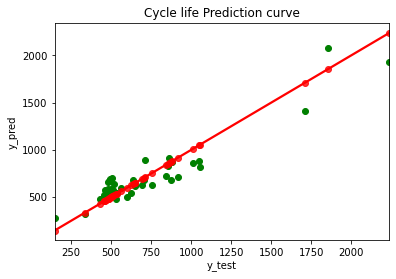

<Figure size 432x288 with 0 Axes>

In [138]:
plt.scatter(y_test_1,y_pred_ro_1,color='g')
#plt.scatter(y_pred_sec,X_test_sec,color='g')
sns.regplot(y_test_1,y_test_1,color='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Cycle life Prediction curve')
plt.show()
plt.savefig("y_test_pred.jpg")

In [39]:
len(y_train)
Matrix(y_train,y_pred_train)

,MSE,MAE,RMSE,MAPE,R2_SCORE
0,20687.807606,111.079335,143.832568,18.967323,0.801865


In [41]:
linreg.score(X_train,y_train)

0.8018647880883822

In [ ]:
plt.plot(y_pred,y_pred_train,color='r')
#plt.plot(y_pred,df_test['variance'],color='g')
plt.xlabel('y')
plt.ylabel('X')
plt.title('Cycle life Prediction curve')
plt.show()

In [86]:
Matrix(y_test_sec,y_pred_sec)

,MSE,MAE,RMSE,MAPE,R2_SCORE
0,44891.748966,158.075613,211.876731,15.574956,0.516524


In [163]:
from sklearn.metrics import r2_score
r2_score(y_test_sec,y_pred_sec)

0.3463796092079542

In [43]:
linreg.score(X_test_sec,y_test_sec)

0.5274779573732269

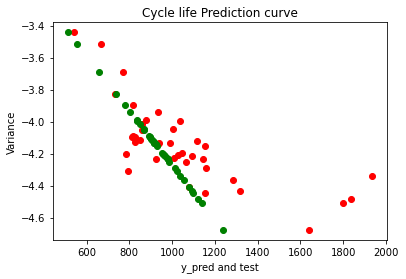

In [148]:
plt.scatter(y_test_sec,X_test_sec,color='r')
plt.scatter(y_pred_sec,X_test_sec,color='g')
plt.xlabel('y_pred and test')
plt.ylabel('Variance')
plt.title('Cycle life Prediction curve')
plt.show()

In [34]:
linreg.score(X_test,y_test)

0.8254377440508697

In [14]:
from sklearn.metrics import r2_score

In [46]:
r2_score(y_test,y_pred)#43

0.7981221145544868

In [26]:
from sklearn.linear_model import Lasso

In [27]:
lasso_reg = Lasso(normalize=True)

In [28]:
lasso_reg.fit(X_train,y_train)

Lasso(normalize=True)

In [29]:
y_pred_lass =lasso_reg.predict(X_test)

In [30]:
y_pred_lass

array([1583.95158802, 1411.69342665, 1339.8572547 ,  753.6433307 ,
        949.96298451,  940.02771495,  974.54549219,  672.80277106,
        482.36764913,  936.78942361,  927.28386437,  810.54315518,
        800.25920934,  758.86119645,  684.82068026,  755.37231733,
        688.93872063,  574.75665837,  956.77869598,  684.82068026,
        521.01313381,   50.12788165,  186.83849752,  640.62016461,
        657.50908981,  450.05937388,  571.03518126,  590.13394989,
        721.0472809 ,  608.45631476,  704.55348495,  508.80043406,
        587.1885745 ,  642.974092  ,  562.83072179,  708.96052115,
        614.82748708,  596.11502247,  611.62458761,  630.25538512,
        539.5115499 ,  483.05157566,  933.58652414])

In [40]:
def Matrix(y_test,y_pred):
    import pandas as pd
    from sklearn import metrics
    x = []
    MSE = metrics.mean_squared_error(y_test,y_pred)
    MAE = metrics.mean_absolute_error(y_test,y_pred)
    RMSE= np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
    x.extend([MSE,MAE,RMSE,MAPE])
    df = pd.DataFrame(x)
    df1 = df.transpose()
    df1.columns = ['MSE','MAE','RMSE','MAPE']
    return(df1)

In [32]:
y_pred_lasso_final = []
for i in y_pred_lass:
    y_pred_lasso_final.append([i])

In [33]:
Matrix(y_test,y_pred_lasso_final)

,MSE,MAE,RMSE,MAPE
0,32285.016174,124.772802,179.680317,18.940249


In [34]:
lasso_reg.score(X_test,y_test)

0.7890122426231544

In [42]:
# Root mean squared error
np.sqrt(metrics.mean_squared_error(y_test,y_pred_lass))

164.61497447835646

In [229]:
Matrix(y_test,y_pred)

,MSE,MAE,RMSE,MAPE
0,26711.242997,117.590365,163.435746,20.123154


In [86]:
from sklearn.linear_model import ElasticNet

In [87]:
from sklearn.linear_model import ElasticNetCV

clf = ElasticNetCV(l1_ratio=0.5)
clf.fit(X_train,y_train)
clf.alpha_

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.00010438487147241127

In [88]:
model = ElasticNet(alpha=0.00010438487147241127, l1_ratio= 0.5)
#model = ElasticNet(alpha=0.000010, l1_ratio= 0.550000)
model.fit(X_train,y_train)
y_pred_elastic =model.predict(X_test)
y_pred_sec_elastic = model.predict(X_test_sec)

In [157]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
#Standardize data before
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)
# X_test_sec = scaler.fit_transform(X_test_sec)
#model = ElasticNet(alpha=0.010000, l1_ratio= 0.760000)
model = ElasticNet(alpha=0.00010438487147241127, l1_ratio= 0.5)
model.fit(X_train,y_train)
y_pred_elastic =model.predict(X_test)
y_pred_sec_elastic = model.predict(X_test_sec)

In [158]:
y_pred_elastic_1 = 10**y_pred_elastic
y_pred_sec_elastic_1 = 10**y_pred_sec_elastic

In [159]:
y_pred_elastic_final = []
for i in y_pred_elastic_1:
    y_pred_elastic_final.append([i])

In [160]:
len(y_pred_elastic)

42

In [161]:
Matrix(y_test_1,y_pred_elastic_final)

,MSE,MAE,RMSE,MAPE,R2_SCORE
0,26864.303182,116.001967,163.903335,14.714263,0.819681


In [162]:
y_pred_elastic_final_1 = []
for j in y_pred_sec_elastic_1:
    y_pred_elastic_final_1.append([j])

In [163]:
Matrix(y_test_sec_1,y_pred_elastic_final_1)

,MSE,MAE,RMSE,MAPE,R2_SCORE
0,180642.637799,378.752215,425.02075,36.264102,-0.945487


In [156]:
y_pred_elastic_final

[[1810.4122655300619],
 [1683.9602848997483],
 [1252.2238772087487],
 [628.3759366874673],
 [746.1057199912634],
 [791.9669945181846],
 [826.7691144255892],
 [574.1747440475647],
 [447.49433083243935],
 [779.5032724155046],
 [756.6354342342244],
 [660.8064351033529],
 [656.0069567283654],
 [627.0397070970638],
 [576.0962479316637],
 [621.7998748744957],
 [572.2771899831362],
 [504.2518287367891],
 [801.8262551881],
 [575.1324695654985],
 [470.42423997997656],
 [306.1371959582309],
 [540.1735595799562],
 [549.5744225433565],
 [446.01204074097103],
 [497.4103413956157],
 [611.7959909219122],
 [537.9162971006278],
 [529.9335102320238],
 [633.8304260830247],
 [525.07955065525],
 [642.3586106038623],
 [610.5875991956798],
 [585.0539896428346],
 [621.7998748744957],
 [504.2518287367891],
 [531.3517911628772],
 [515.2169520090348],
 [514.5839462200879],
 [484.20871283136165],
 [443.82288815975954],
 [805.2172566958448]]

In [41]:
model.score(X_test,y_test)

0.6709247137396337

In [487]:
y_pred = linreg.predict(X_test)

In [500]:
np.mean(np.abs((y_test - y_pred_elastic_final)/y_test))*100

-7.034231765245025

In [548]:
Matrix(y_test,y_pred_elastic_final)

,MSE,MAE,RMSE,MAPE
0,26920.193542,117.956065,164.073744,20.042486


In [231]:
def MAPE(y_test,y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
    return mape

In [232]:
MAPE(y_test,y_pred_elastic)

57.19223384073685

In [290]:
Matrix(y_test,y_pred_elastic_final)

,MSE,MAE,RMSE,MAPE
0,28209.745096,119.828387,167.957569,19.629482
